# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.

In [59]:
import pandas as pd

#print("QUESTION 1:")
data = pd.read_csv('data/airbnb_hw.csv')

cleaned_price = data['Price'].str.replace(',','')
cleaned_price = pd.to_numeric(cleaned_price, errors='coerce')
data['Price'] = cleaned_price
del cleaned_price


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [61]:
print(f"The dataset has {data.shape[0]} observations and {data.shape[1]} variables.")
print(f"The variables included are {list(data.columns)}")

data.head()
#data.describe()

The dataset has 30478 observations and 13 variables.
The variables included are ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [45]:
pd.crosstab(data['Property Type'], data['Room Type'])

QUESTION 3


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


Most of the observances have Property Type Apartment, followed by House, and then Loft. It is more common to rent the entire home/apartment in apartment properties, while it is more common to rent only a private room in house properties. For Loft properties, it is only slightly more common to rent out the entire home/apartment than just a private room, but the occurrence values are pretty close to each other, especially compared to the drastic differences in House and Apartment. 

4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

QUESTION 4


Text(0.5, 1.0, 'Histogram of Price Variable')

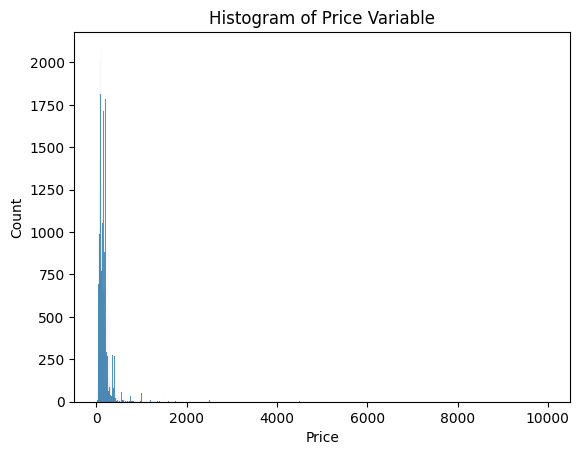

In [46]:
print("QUESTION 4")

import seaborn as sns

sns.histplot(data['Price']).set_title("Histogram of Price Variable")

Text(0.5, 1.0, 'Kernel Density of Price Variable')

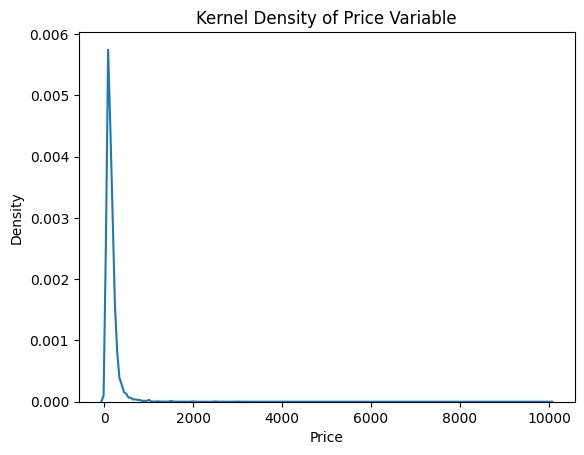

In [47]:
sns.kdeplot(data['Price']).set_title("Kernel Density of Price Variable")

Text(0.5, 1.0, 'Box Plot of Price Variable')

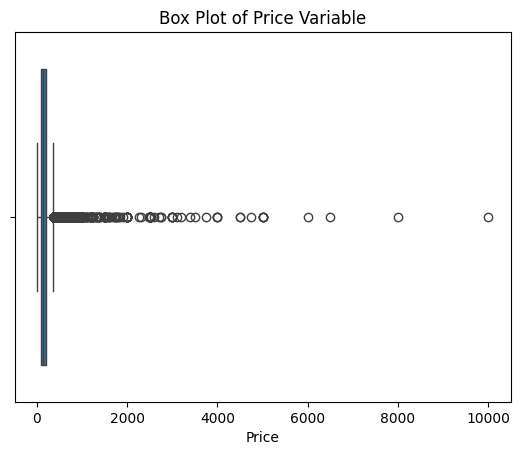

In [67]:
sns.boxplot(x=data['Price']).set_title("Box Plot of Price Variable")

The data seems to be badly scaled. For the histogram, most of the data points can be seen within prices $0-2000, while the data points with a higher price point than 2000 can barely/not be seen because the counts are so low. From the box plot, it seems there are a lot of outliers since the median and inner and upper quartile's are below 2,000. There are still a good amount of data points greater than this upper quartile and then a few with really high prices (above 6,000) that seem like true outliers of the dataset that we may benefit from taking out.

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


Text(0.5, 1.0, 'Adjusted Histogram of Price Variable')

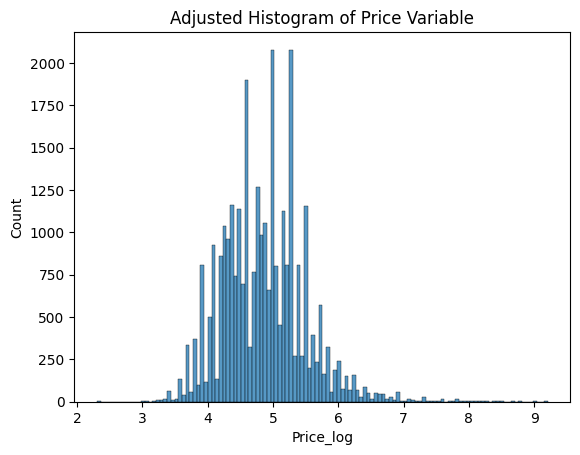

In [68]:
import numpy as np
data['Price_log'] = np.log(data['Price'])

sns.histplot(data['Price_log']).set_title("Adjusted Histogram of Price Variable")

Text(0.5, 1.0, 'Adjusted Kernel Density of Price Variable')

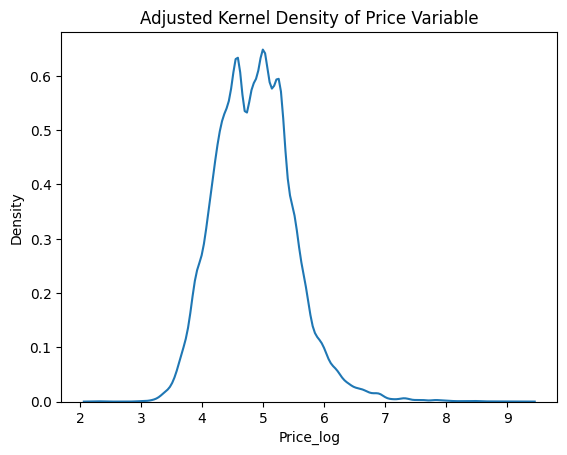

In [50]:
sns.kdeplot(data['Price_log']).set_title("Adjusted Kernel Density of Price Variable")

Text(0.5, 1.0, 'Adjusted Box Plot of Price Variable')

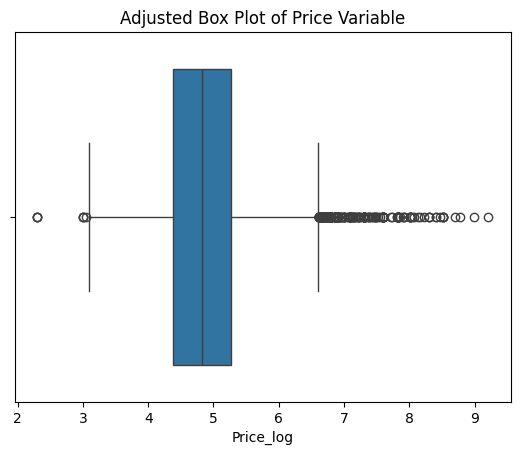

In [51]:
sns.boxplot(x=data['Price_log']).set_title("Adjusted Box Plot of Price Variable")

5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='Price_log'>

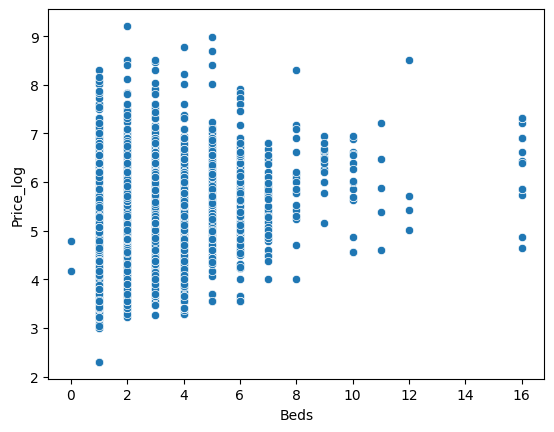

In [58]:
sns.scatterplot(data = data, y = data['Price_log'], x=data['Beds'])

In [56]:
data.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

As the number of beds increase from 0-5, the prices' average and the prices' standard deviation increases. 

6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

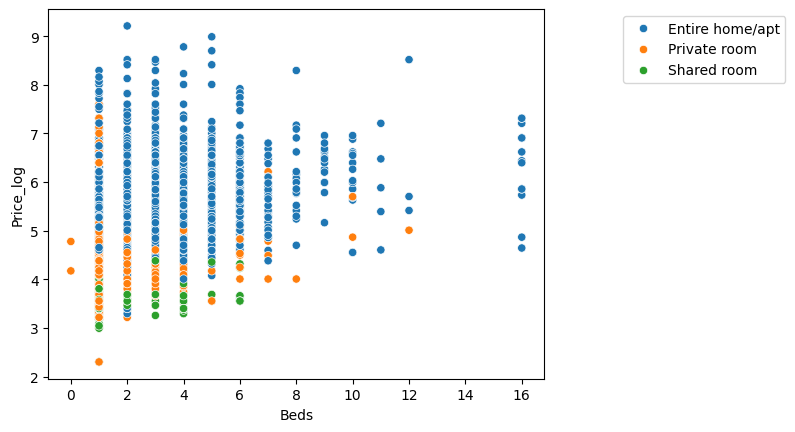

In [85]:
plt = sns.scatterplot(data = data, y = 'Price_log', x='Beds', hue='Room Type')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

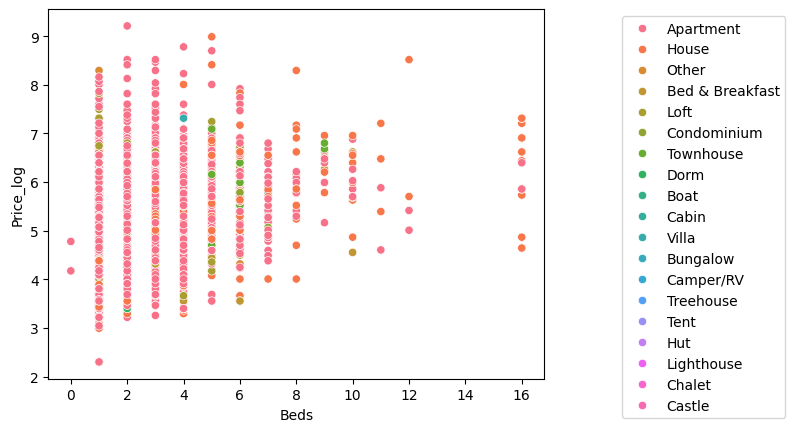

In [82]:
plt = sns.scatterplot(y = data['Price_log'], x=data['Beds'], hue=data['Property Type'])
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))


 Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [103]:
data.groupby(['Property Type', 'Room Type'])['Price'].describe().sort_values('mean', ascending=False)

Price_log  Price
4.007333   55       437
4.025352   56        26
4.043051   57        36
4.060443   58        59
4.077537   59       167
                   ... 
5.983936   397        5
5.986452   398        1
5.988961   399       56
5.991465   400      159
5.993961   401        1
Name: count, Length: 305, dtype: int64

Room Type "Entire home/apt" seems to have the highest prices on average and the highest standard deviation, while Property Type "Other" seems to have the highest prices on average and the highest standard deviation as well. The median seems to be a more reliable estimate of central tendency since there are some very high maximum values that are much higher than the upper quartile. The mean would be more skewed from these high maximum numbers and so I would say the median is a more reliable estimate of central tendency.

7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

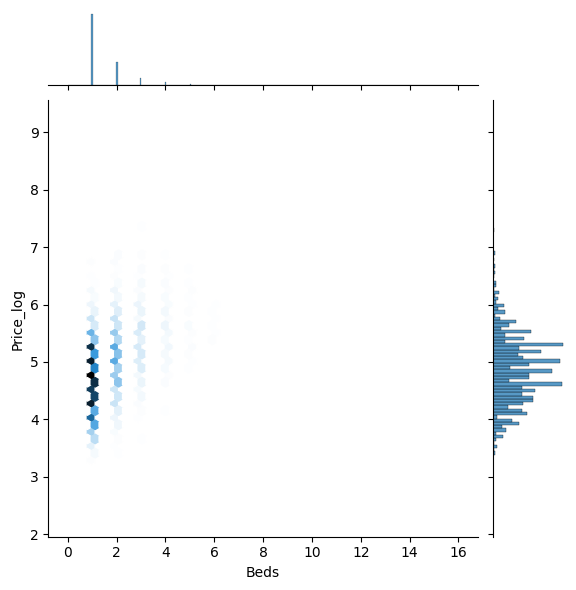

In [87]:
sns.jointplot(data=data,x='Beds',y='Price_log',kind='hex')

In [104]:
data.groupby(['Price_log'])['Price'].value_counts().loc[4:6]


Price_log  Price
4.007333   55       437
4.025352   56        26
4.043051   57        36
4.060443   58        59
4.077537   59       167
                   ... 
5.983936   397        5
5.986452   398        1
5.988961   399       56
5.991465   400      159
5.993961   401        1
Name: count, Length: 305, dtype: int64

The data is actually distributed mostly around airBnBs with 0-2 beds, with a few in the 2-4 beds range. The price log is densest around log 4 to log 6 (or around $55-$400). As for the plots in 5 and 6, it would probably be more beneficial to look at a smaller range since there are many outliers that "cloud" the graph. 

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
6. Create a scatter plot, and describe the relationship you see.
7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. Pick a dataset about something you are interested in - I downloaded the dataset from the Innovation Center Model Summary Information - https://data.cms.gov/cms-innovation-center-programs/innovation-center-model-summary-information/data

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

There are four columns that are completely blank: 
- Number of Beneficiaries Impacted
- Number of Physicians Impacted
- Date Began
- Date Ended
and all the data dictionary has to say about that is that "This data is not currently being populated, so nothing is displaying as a result of this field". At least I know I can just remove these columns though as they will not provide any information. 

There are no purely numerical columns. In the categorical columns, Number of participants has 19 missing values, Authority has 1 missing value and States has 32 missing values. Other than those columns, there is no other missing data. 
The data dictionary document does not provide how these missings can be handled, but in reading the descriptions of the columns, I assume that some of the number of participants may be missing because those entries are in the Announced stage of the model life cycle and are not implemented/released yet. However, there are still missing values for models that are not in the Active stage. 
Authority is regarding what statutory or regulatory authority is the basis for implementation of the model or demonstration, so maybe the missing value does not have a statutory or regulatory authority as the basis. 
States has the most missing values and represents the geographic reach of the model. It appears that many of these values are missing because the outreach is for all 50 states in the US. 
I think the data dictionary could have been better about telling me about missing values instead of me exploring the dataset and crosstabbing to find some information out, but I was not ultimately able to understand how to proceed in these columns with the missing values. 

In [151]:
import pandas as pd

data = pd.read_csv("data/Innovation_Center_Model_Summary_Information.csv", encoding_errors = 'backslashreplace')
data.isnull().describe()

,Model Name,Stage,Number of Participants,Category,Authority,Description,Number of Beneficiaries Impacted,Number of Physicians Impacted,Date Began,Date Ended,States,Keywords,URL,Display Model Summary,Unique ID
count,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
unique,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1
top,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False
freq,90,90,71,90,89,90,90,90,90,90,58,90,90,90,90


3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

I think the following variables are interesting: Category, Authority, and Stage.
Category and Authority are interesting to me since they tell me more about what type of problem the model/program is aiming to solve. Stage is interesting with these two variables as I can see which stage these models/programs are at and how that relates to those two variables. 
Stage is already tidy. Authority is already tidy, but I could see myself creating a new category with the broad Act the model/program belongs to excluding the specific Section number, 

In [169]:
#data = data.drop(columns=["Number of Beneficiaries Impacted", "Number of Physicians Impacted", "Date Began", "Date Ended"])
print(data.dtypes)
print("\n")
print(data['Category'].value_counts())
print("\n")
print(data['Authority'].value_counts())
print("\n")
print(data['Stage'].value_counts())

Model Name                object
Stage                     object
Number of Participants    object
Category                  object
Authority                 object
Description               object
States                    object
Keywords                  object
URL                       object
Display Model Summary       bool
Unique ID                  int64
dtype: object


Category
Disease-Specific & Episode-Based Models                                                 19
Accountable Care Models                                                                 17
Statutory Demonstrations and Other Projects                                             16
State & Community-Based Models                                                          15
State & Community-Based Models, Accountable Care Models                                  4
Prescription Drug Models                                                                 2
Health Plan Models                                                

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

C:\Users\Jennifer\AppData\Local\Temp\ipykernel_36212\1856978142.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


[]

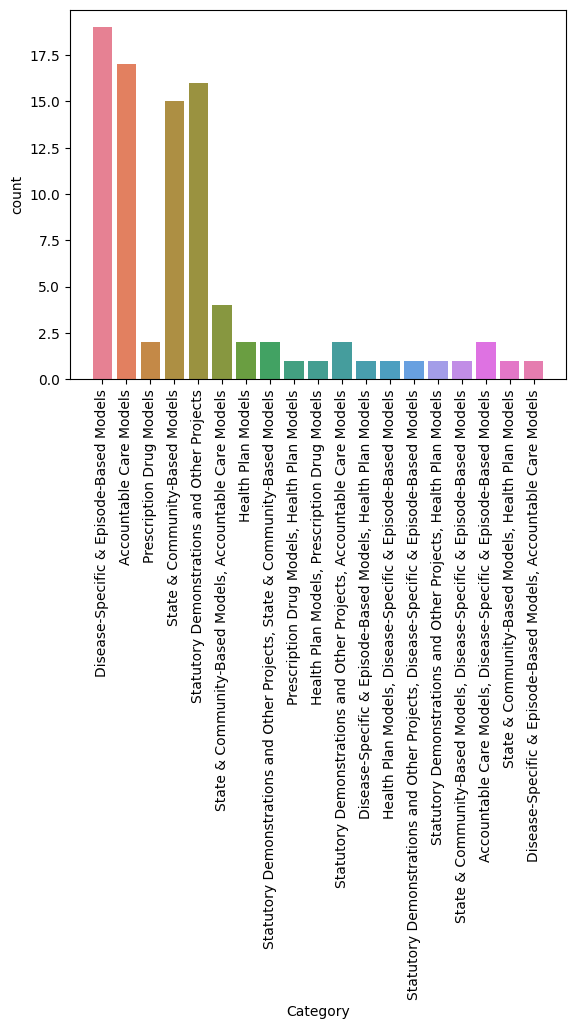

In [248]:
import pandas as pd
import seaborn as sns

ax = sns.countplot(data=data, x='Category', hue='Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.plot()


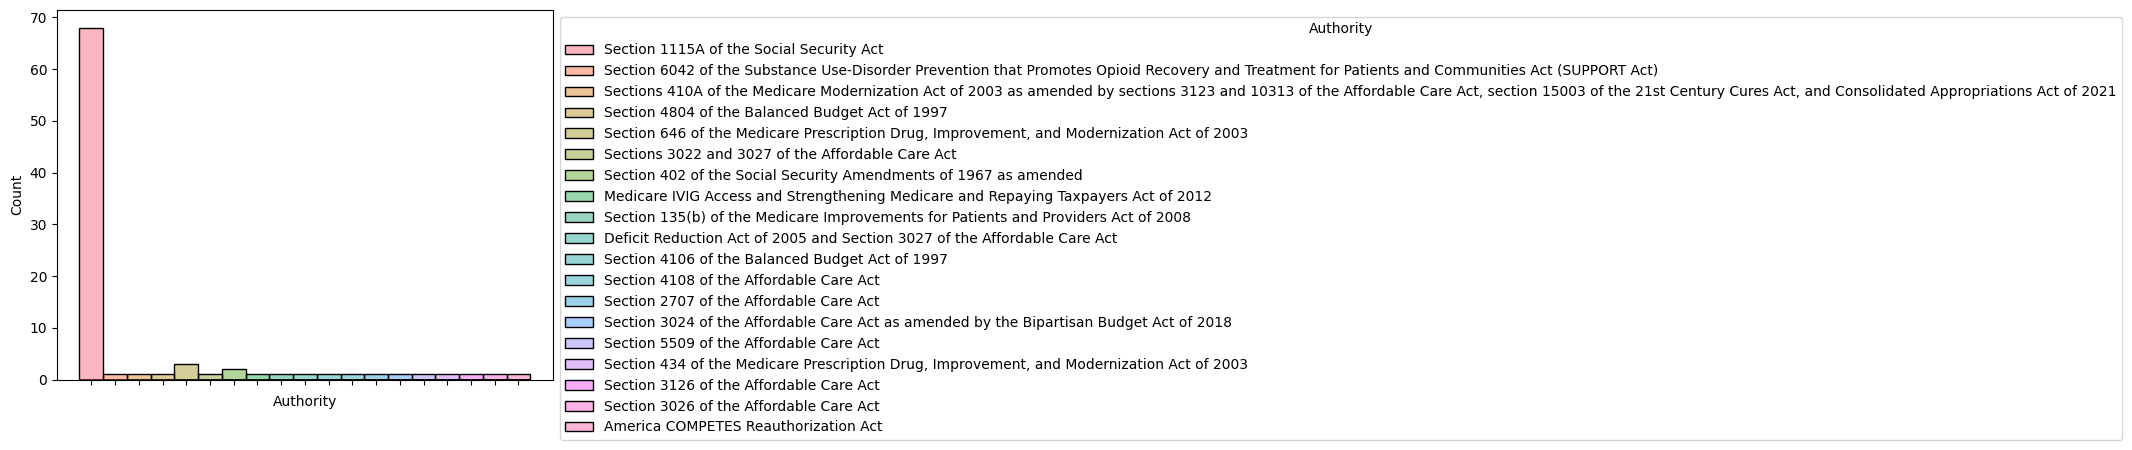

In [235]:
ax = sns.histplot(data=data, x='Authority', hue='Authority')
ax.set_xticklabels([])
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

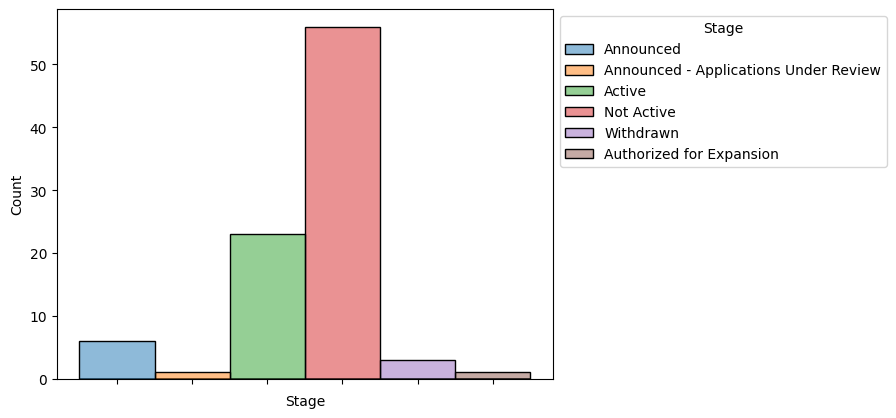

In [236]:
ax = sns.histplot(data=data, x='Stage', hue='Stage')
ax.set_xticklabels([])
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 

I created a stacked histogram using pandas plot instead of seaborn because I was having some complications with it. Out of the active models/programs, most of them are "State & Community-Based Modes, Disease-Specific & Episode-Based Models".

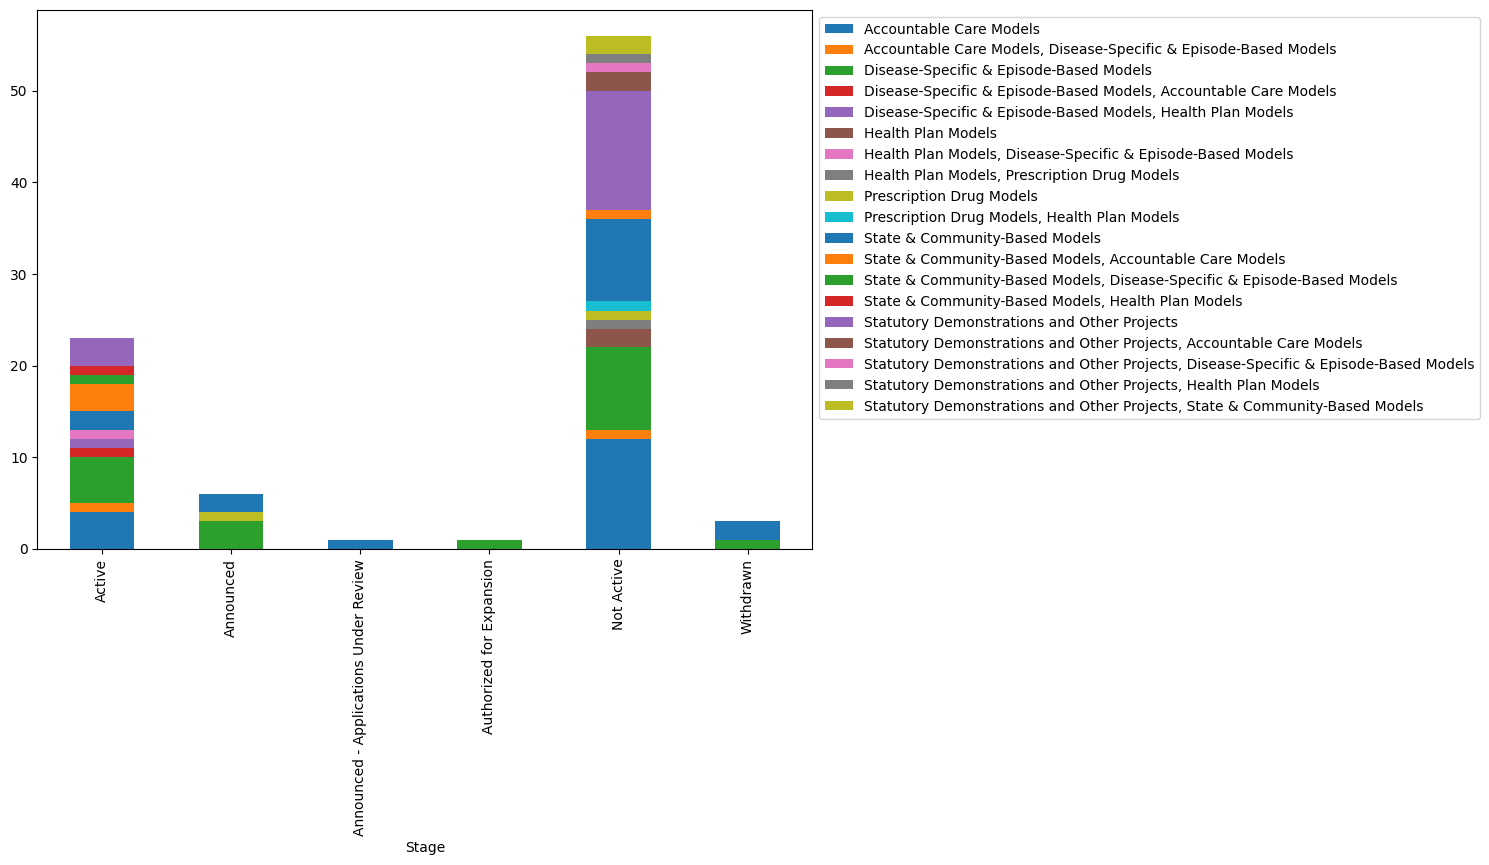

In [238]:
df_grouped = data.groupby(['Stage', 'Category']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='Stage', columns='Category', values='count')

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


6. Create a scatter plot, and describe the relationship you see.
I attempted to create a meaningful-ish scatterplot but I found it difficult without numerical columns. 

C:\Users\Jennifer\AppData\Local\Temp\ipykernel_36212\1603887350.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='center')


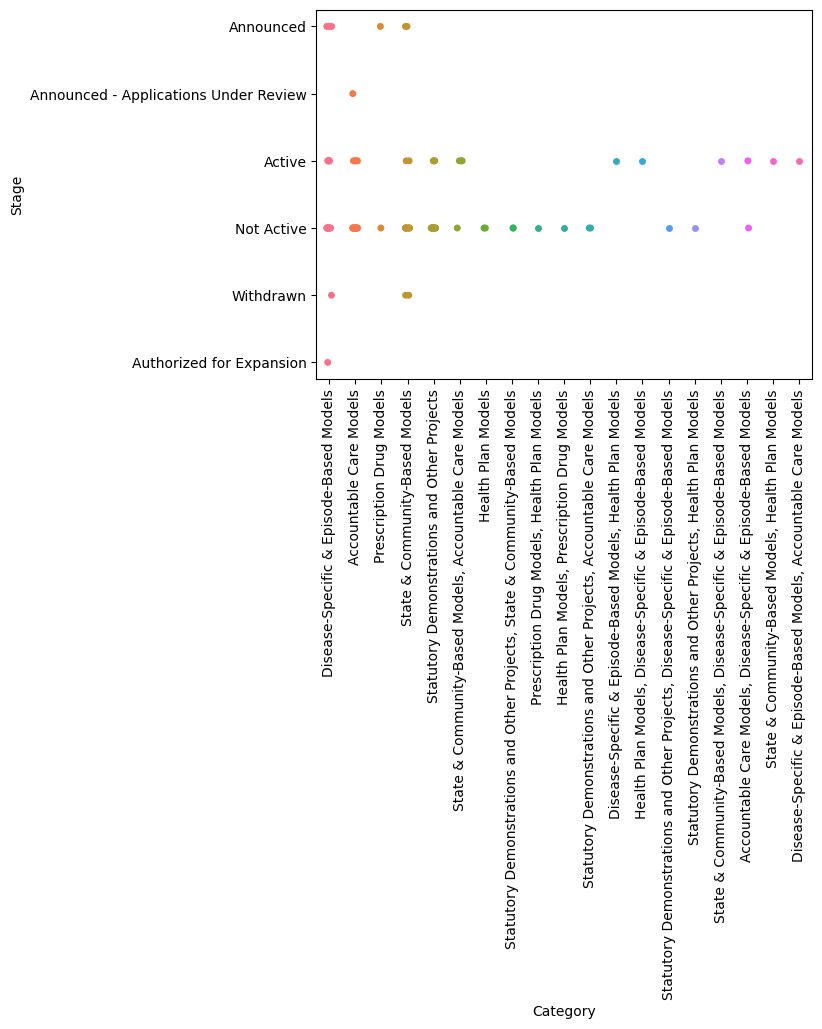

In [247]:
plot = sns.stripplot(data=data, x='Category', y='Stage', jitter=True, hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='center')
print('')


7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.



In [252]:
filtered_data = data[data['Authority'] == 'Section 1115A of the Social Security Act']
pd.crosstab(filtered_data['Category'], filtered_data['Stage']).sort_values(by='Active',ascending=False)

Stage,Active,Announced,Announced - Applications Under Review,Authorized for Expansion,Not Active,Withdrawn
Category,,,,,,
Disease-Specific & Episode-Based Models,5,3,0,1,8,1
Accountable Care Models,4,0,1,0,8,0
"State & Community-Based Models, Accountable Care Models",3,0,0,0,1,0
State & Community-Based Models,2,2,0,0,9,2
"Disease-Specific & Episode-Based Models, Health Plan Models",1,0,0,0,0,0
"Health Plan Models, Disease-Specific & Episode-Based Models",1,0,0,0,0,0
"Accountable Care Models, Disease-Specific & Episode-Based Models",1,0,0,0,1,0
"Disease-Specific & Episode-Based Models, Accountable Care Models",1,0,0,0,0,0
"State & Community-Based Models, Health Plan Models",1,0,0,0,0,0


For models/programs directed at Section 1115A of the Social Security Act, Disease-Specific & Episode-Based Models have the most active models/programs. Noteably, this category also has the most announced models/programs and the only authorization for expansion telling me there is a larger focus in Disease-Specific & Episode-Based Models currently being implemented and used.